In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import networkx as nx
from tqdm.notebook import tqdm

class Graph(object):
    def __init__(self, Matrix, add_edge=None, add_node=None):
        self.Matrix = Matrix
        self.nodenum = len(self.Matrix)
        self.edgenum = self.get_edgenum()
        self._weight_ = np.zeros((self.nodenum, self.nodenum))
        self.add_edge = add_edge
        self.add_node = add_node

    def get_edgenum(self):
        count = 0
        for i in range(self.nodenum):
            for j in range(i):
                if self.Matrix[i][j] > 0 and self.Matrix[i][j] < 9999:
                    count += 1
        return count

    def plot_matrix(self, pos=None, figsize=(15,15), title="Pipeline ONE"):
        plt.figure(figsize=(12,9)) 
        self._get_edge()
        G_nx = nx.Graph()
        G_nx2 = nx.Graph()
        if self.add_edge!=None:
          for i in range(self.nodenum):
              for j in range(self.nodenum):
                  if self._weight_[i, j]!=0 and i<13 and j<13:
                    G_nx.add_edge(i, j)
                  if self._weight_[i, j]!=0 and i>0 and j>0:
                    G_nx2.add_edge(i, j)
        else:
          for i in range(self.nodenum):
              for j in range(self.nodenum):
                  if self._weight_[i, j]!= 0:
                      G_nx.add_edge(i, j)
                    
        if self.add_edge!=None:
          nx.draw_networkx(G_nx, pos[:len(self.add_edge)+1], alpha=0.85)
          nx.draw_networkx(G_nx2,pos,alpha=0.6,with_labels=False,node_color='slateblue',
              node_shape=".", node_size=100, style='dashed')
        else:
          nx.draw_networkx(G_nx, pos, alpha=0.85)
        GG = nx.Graph()
        GG.add_node(0)
        nx.draw_networkx(GG, {0:pos[0]}, node_color='r',node_shape='*', node_size=1200)
        plt.title(title)
        plt.show() # display
    
    def _get_edge(self):
      edge = self.prim()
      if self.add_node!=None:
        for i in edge:
          for id_j, j in enumerate(self.add_node):
            if i[0]==j:
              i[0] = 13+id_j
            if i[1]==j:
              i[1] = 13+id_j
      for k in edge:
        self._weight_[k[0],k[1]] = self.Matrix[k[0],k[1]]
      if self.add_node!=None:
        for i in edge:
          for id_j, j in enumerate(self.add_node):
            if i[0]==13+id_j:
              i[0] = j
            if i[1]==13+id_j:
              i[1] = j
      return self._weight_

    def prim(self, first_node = 0):
        # 存储已选顶点，初始化时可随机选择一个起点
        select = [first_node]
        # 存储未选顶点
        candidate = list(range(0, self.nodenum))
        candidate.remove(first_node)
        if self.add_edge!=None:
          node = []
          select.remove(first_node)
          for i in self.add_edge:
            if i[0] not in node:
              node.append(i[0])
            if i[1] not in node:
              node.append(i[1]) 
          for i in node:
            select.append(i)
            if i in candidate:
              candidate.remove(i)
        # 存储每次搜索到的最小生成树的边
        edge = []+self.add_edge if self.add_edge!=None else []

        def min_edge(select, candidate, graph):
            min_weight = np.inf
            v, u = 0, 0
            for i in select:
                for j in candidate:
                    if min_weight > graph[i][j]:
                        min_weight = graph[i][j]
                        v, u = i, j
            return v, u

        num = len(self.add_edge)+1 if self.add_edge!=None else 1
        for i in range(num, self.nodenum):
            v, u = min_edge(select, candidate, self.Matrix)
            edge.append([v, u])
            select.append(u)
            candidate.remove(u)
        if self.add_node!=None:
          for i in edge:
            for id_j, j in enumerate(self.add_node):
              if i[0]==13+id_j:
                i[0] = j
              if i[1]==13+id_j:
                i[1] = j
        return edge

In [2]:
def distance(x1,y1,x2,y2):
  return np.sqrt((x1-x2)**2+(y1-y2)**2)

def fix(x):
  if x.startswith('A'):
    return 0
  return 1 if x.startswith('V') else 2

def get_xy(i,j=0, add_node = None):
  pos = []   # 元组中的两个数字是第i（从0开始计数）个点的坐标
  if add_node==None:
    for k in range(j, i):
      pos.append((data['X坐标'].loc[k], data['Y坐标'].loc[k]))
  else:
    for k in range(j, i):
      pos.append((data['X坐标'].loc[k], data['Y坐标'].loc[k]))
    for k in add_node:
      pos.append((data['X坐标'].loc[k], data['Y坐标'].loc[k]))
  return pos

In [3]:
weight_array = np.zeros((181,181))
data = pd.read_excel('/content/drive/My Drive/competitions/CMCM/demo1/data.xlsx')
data['类型'] = data['类型'].apply(lambda x:fix(x))

# 初始化权重矩阵
for i in tqdm(range(181)):
  for j in range(181):
    point_i = data[data['序号']==i]
    point_j = data[data['序号']==j]
    weight_array[i][j] = distance(point_i['X坐标'].values,
                    point_i['Y坐标'].values,
                    point_j['X坐标'].values,
                    point_j['Y坐标'].values)
    if (i==0 and j>12) or (j==0 and i>12):
      weight_array[i][j]=0
weight_array[weight_array==0] = 10000

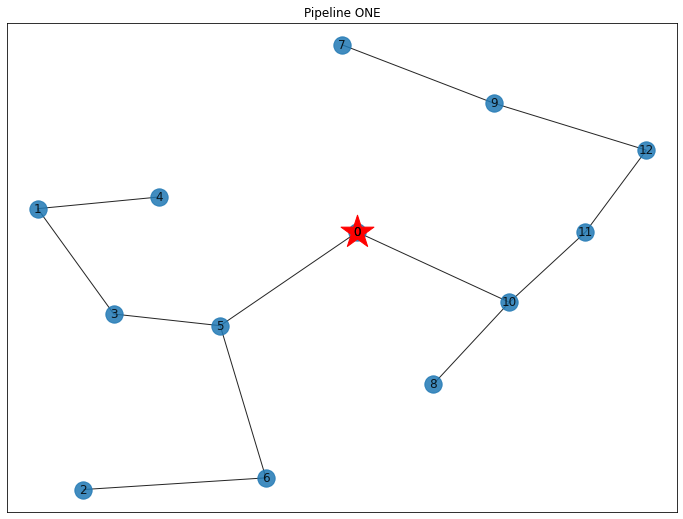

In [4]:
weight_array_A = weight_array[:13,:13]
G_A = Graph(weight_array_A)
pos_A = get_xy(G_A.nodenum)
edge_A = G_A.prim(first_node=0)
G_A.plot_matrix(pos_A)

In [5]:
sum = 0
for p in edge_A:
  i,j=p[0],p[1]
  sum = sum+weight_array[i][j]
sum

120.94121490556834

节点数据为181，边数为16122



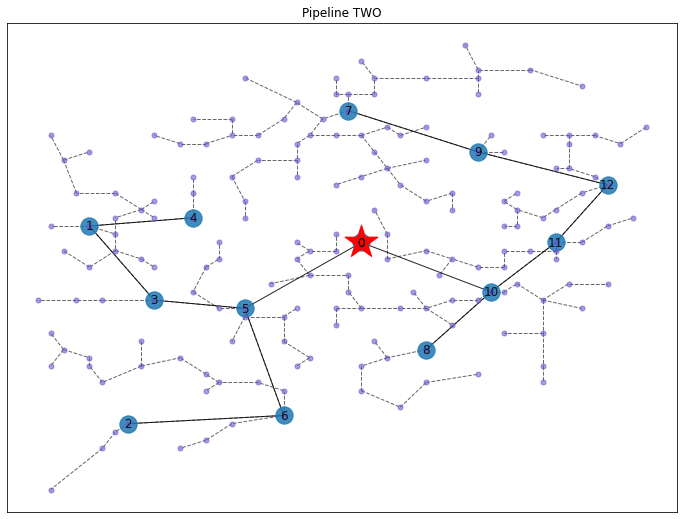

In [6]:
G = Graph(weight_array, edge_A)
print('节点数据为%d，边数为%d\n'%(G.nodenum, G.edgenum))
pos = get_xy(G.nodenum)
edge = G.prim()
G.plot_matrix(pos, title="Pipeline TWO")

In [7]:
sum = 0
for p in edge:
  i,j=p[0],p[1]
  sum = sum+weight_array[i][j]
sum

524.3458156290326

In [8]:
_max = (0,0,0)
_max2 = (0,0,0)
for ed in edge:
  i,j = ed[0],ed[1]
  if _max[0] < weight_array[i][j] and not (i<13 and j<13):
    _max = (weight_array[i][j], i, j)
for ed in edge:
  i,j = ed[0],ed[1]
  if i!=126 and j!=125:
    if _max2[0] < weight_array[i][j] and not (i<13 and j<13):
      _max2 = (weight_array[i][j], i, j)
  
_max, _max2

((6.4031242374328485, 126, 125), (5.0, 88, 89))

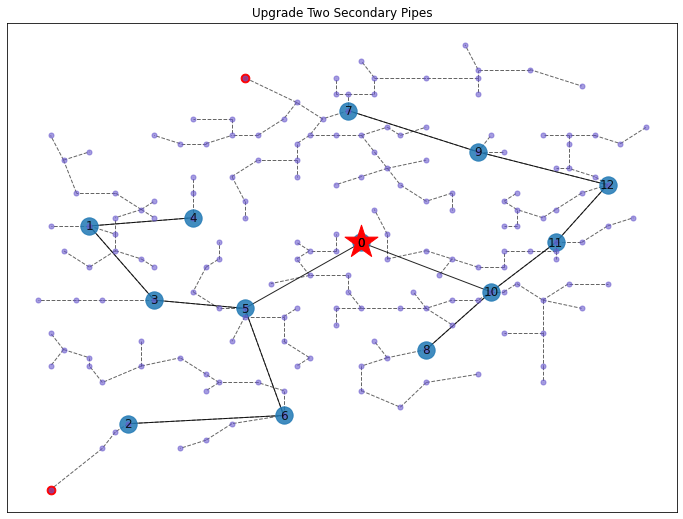

In [9]:
_weight_ = G._get_edge()
plt.figure(figsize=(12,9)) 
G_nx = nx.Graph()
G_nx2 = nx.Graph()
G_nx3 = nx.Graph()
G_nx4 = nx.Graph()
GG = nx.Graph()
for i in range(G.nodenum):
    for j in range(G.nodenum):
        if _weight_[i, j]!=0 and i<13 and j<13:
          G_nx.add_edge(i, j)
        if _weight_[i, j]!=0 and i>0 and j>0:
          G_nx2.add_edge(i, j)
# G_nx3.add_edge(126, 125)
# G_nx4.add_edge(88, 89)
G_nx3.add_node(125)
G_nx4.add_node(89)

nx.draw_networkx(G_nx3, {125:pos[125],},node_color='r',
      node_size=300, node_shape='.',with_labels=False, style='dashed')
nx.draw_networkx(G_nx4, {89:pos[89],},node_color='r',
      node_size=300, node_shape='.',with_labels=False, style='dashed')

nx.draw_networkx(G_nx, pos[:len(G.add_edge)+1], alpha=0.85)
nx.draw_networkx(G_nx2,pos,alpha=0.6,with_labels=False,node_color='slateblue',
    node_shape=".", node_size=100, style='dashed')
GG = nx.Graph()
GG.add_node(0)
nx.draw_networkx(GG, {0:pos[0]}, node_color='r',node_shape='*', node_size=1200)

plt.title("Upgrade Two Secondary Pipes")
plt.show() 

# 问题三

In [10]:
def prim_pro(Matrix, add_edge, first_node=0, cost=40):
    nodenum = len(Matrix)

    select = [first_node]
    candidate = list(range(0, nodenum))
    candidate.remove(first_node)
    node = []
    for i in add_edge:
      if i[0] not in node:
        node.append(i[0])
      if i[1] not in node:
        node.append(i[1]) 
    node_A = {}
    for i in node:
      node_A[i] = [0,[i]]  # 存储形式是[dis, [v,u1,u2...]]
    for i in node:
      select.append(i)
      if i in candidate:
        candidate.remove(i)
    # 存储每次搜索到的最小生成树的边
    edge = []+add_edge
    loss = []
    def min_edge(select, candidate, graph):
      min_weight = np.inf
      v, u = 0, 0
      for i in select:
          for j in candidate:
              if min_weight > graph[i][j] and (i,j) not in loss:
                  min_weight = graph[i][j]
                  v, u = i, j
      for x in node:
        if v in node_A[x][1]:
          if node_A[x][0]+min_weight<=cost:
            node_A[x][0] = node_A[x][0]+min_weight
            node_A[x][1].append(u)
          else:
            loss.append((v,u))
            return False, v, u
      return True, v, u

    num = len(add_edge)+1
    test = 0
    while test<num*(nodenum-num):
        flag, v, u = min_edge(select, candidate, Matrix)
        if flag:
          edge.append([v, u])
          select.append(u)
          candidate.remove(u)
        else:
          test = test+1
    return edge, candidate, node_A

In [103]:
dis_min = 10000
dis_e = []
sss = 0
for i in tqdm(range(168)):
  _edge_A = edge_A.copy()
  x = i+13
  _min = 10000
  v,u = 0,0
  for j in range(13):
    if weight_array[x][j]<_min:
      _min = weight_array[x][j]
      v,u = j,x
  _edge_A.append([v,u])
  e, c, node_A_ = prim_pro(weight_array, _edge_A, cost=40)
  sum = 0
  for iii in node_A_:
    sum = sum+node_A_[iii][0]
  if dis_min>sum:
    dis_min = sum
    dis_e = e
    sss = x

In [105]:
sss

41

In [ ]:
node_A_

In [96]:
mat_40 = [1,1,1,1,1,1,1,1,1,1]
mat_35 = [9,8,7,7,7,7,7,7,7,7]
mat_30 = [17,14,13,13,11,11,11,11,11,11,]
mat_25 = [32,29,27,24,22,22,20,20,20,20]
x = list(range(1,11))

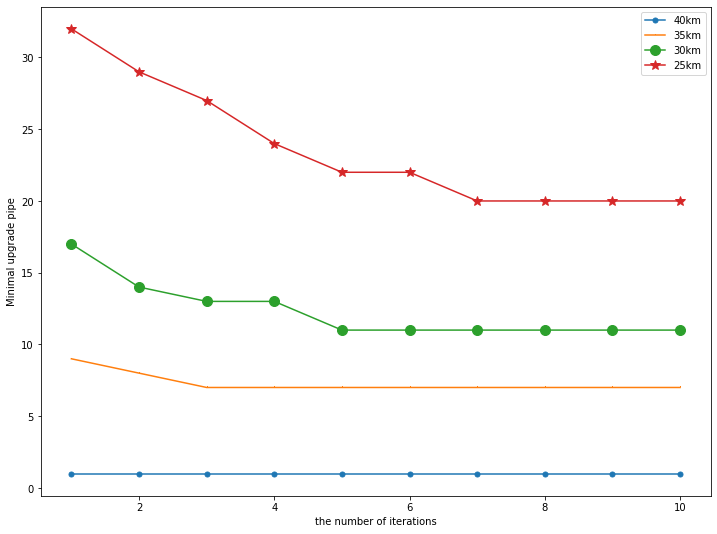

In [102]:
plt.figure(figsize=(12,9)) 

plt.plot(x, mat_40, marker='.', ms=10,label='40km')
plt.plot(x, mat_35, marker=',', ms=10,label='35km')
plt.plot(x, mat_30, marker='o', ms=10,label='30km')
plt.plot(x, mat_25, marker='*', ms=10,label='25km')
plt.legend()  # 让图例生效
plt.ylabel('Minimal upgrade pipe') #X轴标签
plt.xlabel('the number of iterations') #X轴标签

plt.show()

In [109]:
COST = 40

In [110]:
e, c, node_A = prim_pro(weight_array, edge_A, cost=COST)
_size = len(c)
_size#, cnode_A

2

In [112]:
node_A

{0: [0, [0]],
 1: [38.957577257143065,
  [1, 96, 97, 107, 105, 145, 91, 90, 110, 103, 92, 108, 106, 93, 109, 94, 95]],
 2: [17.289473754805524, [2, 127, 126, 38, 36, 125]],
 3: [28.79898987322333, [3, 104, 102, 98, 71]],
 4: [37.527335842160134,
  [4, 73, 78, 42, 76, 83, 82, 55, 79, 80, 81, 54, 88, 41, 74, 111]],
 5: [39.263579932622584,
  [5,
   137,
   138,
   123,
   112,
   139,
   136,
   114,
   115,
   131,
   122,
   144,
   143,
   121,
   28,
   29,
   22,
   21]],
 6: [37.728128698241356,
  [6, 40, 37, 39, 34, 120, 119, 118, 124, 128, 130, 129, 100, 99, 101, 35]],
 7: [39.95303892224429,
  [7,
   85,
   86,
   52,
   87,
   65,
   53,
   64,
   56,
   77,
   84,
   75,
   44,
   43,
   46,
   69,
   48,
   45,
   67,
   47,
   72]],
 8: [36.06764130530638,
  [8, 135, 116, 117, 132, 133, 134, 161, 154, 162, 163, 164]],
 9: [37.09260673187819, [9, 59, 49, 68, 18, 60, 61, 62, 63, 66, 51, 180]],
 10: [38.02191243148413,
  [10,
   147,
   165,
   146,
   152,
   160,
   157,
   1

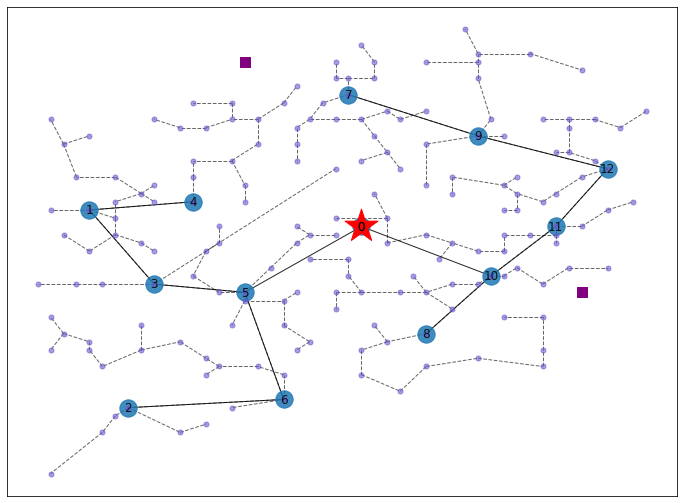

In [111]:
_weight_ = np.zeros((181,181))
for k in e:
  _weight_[k[0],k[1]] = weight_array[k[0],k[1]]
plt.figure(figsize=(12,9)) 
G_nx = nx.Graph()
G_nx2 = nx.Graph()
G_nx3 = nx.Graph()

for i in range(181):
    for j in range(181):
        if _weight_[i, j]!=0 and i<13 and j<13:
          G_nx.add_edge(i, j)
        if _weight_[i, j]!=0 and i>0 and j>0:
          G_nx2.add_edge(i, j)
nx.draw_networkx(G_nx, pos[:len(edge_A)+1], alpha=0.85)
nx.draw_networkx(G_nx2,pos,alpha=0.6,with_labels=False,node_color='slateblue',
    node_shape=".", node_size=100, style='dashed')
GG = nx.Graph()
GG.add_node(0)
nx.draw_networkx(GG, {0:pos[0]}, node_color='r',node_shape='*', node_size=1200
                 ,label='Central pipeline')
p = {}
for i in c:
  G_nx3.add_node(i)
  p[i] = pos[i]
nx.draw_networkx(G_nx3, p, node_color='purple', node_size=120,with_labels=False,
    node_shape=",",label='Isolated point')

plt.show() # display

In [88]:
def fun(node_B, learning = 100):
  node_B_index = []
  for i in range(_size):
    if node_B[i]:
      node_B_index.append(i+13)
  node_A_index = list(range(0, 13))+node_B_index
  weight_array_A = np.zeros((len(node_A_index),len(node_A_index)))
  for id_i,i in enumerate(node_A_index):
    for id_j,j in enumerate(node_A_index):
        weight_array_A[id_i][id_j] = weight_array[i][j]
  G_A = Graph(weight_array_A)
  edge_AA = G_A.prim(first_node=0)
  e, c, node_A = prim_pro(weight_array, edge_AA, cost=COST)
  return np.sum(node_B)+learning*len(c)

def mutate(node_B1, mu = 0.05):
  l = len(node_B1)
  for i in range(l):
    p = np.random.random()
    if p < mu:
      node_B1[i] = 0 if node_B1[i]==1 else 0 
  return node_B1

def cross(node_B1,node_B2):
  le = round(len(node_B1)/4)
  temp = node_B1[:le].copy()
  node_B1[:le] = node_B2[:le]
  node_B2[:le] = temp
  return node_B1,node_B2

def select(geti):
  sss = []
  for i in tqdm(geti):
    sss.append(fun(i))
  idx = [i for i,v in sorted(enumerate(sss), key=lambda x:x[1])]
  geti2 = []
  for i in idx:
    geti2.append(geti[i])
  le = round(len(geti)*3/4)
  # if le!=1:
  #   le = le-1
  g = []
  for i in range(le):
    g.append(geti2[i])
  return g, sss, idx

In [89]:
geti = []


for i in range(5):
  node_B = np.random.randint(0,2,size=(_size)) # 初始化个体
  geti.append(node_B)
for i in range(5):
  for i in range(len(geti)):
    geti[i] = mutate(geti[i])
  if len(geti)-1!=1:
    for i in range(0, len(geti)-1, 2):
      geti[i],geti[i-1] = cross(geti[i],geti[i-1])
  geti, sss, idx = select(geti)
  print(sss)
  print(idx)


[30, 29, 31, 24, 22]
[4, 3, 1, 0, 2]



[216, 18, 32, 31]
[1, 3, 2, 0]



[22, 29, 26]
[0, 2, 1]



[20, 24]
[0, 1]



[20, 23]
[0, 1]


In [ ]:
geti[idx[0]], sss[idx[0]], c

In [91]:
add_node=[]
for i,j in enumerate(geti[idx[0]]):
  if j==1:
    add_node.append(c[i])
add_node

[18,
 19,
 21,
 22,
 23,
 24,
 46,
 51,
 62,
 66,
 72,
 88,
 95,
 106,
 121,
 143,
 163,
 166,
 167,
 180]

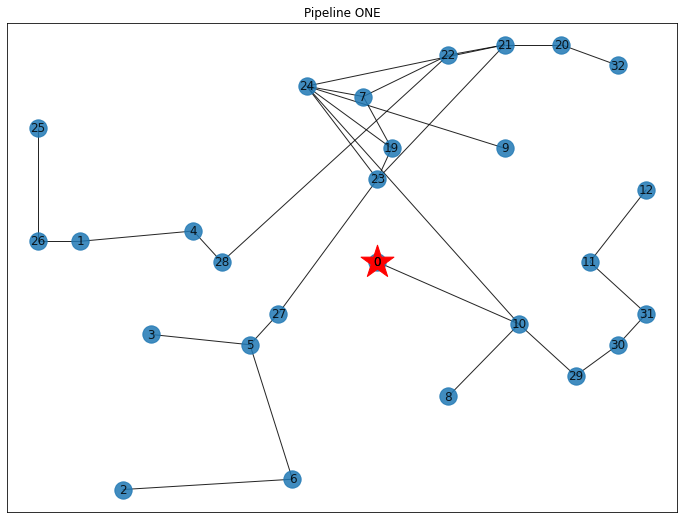

In [92]:
node_A_index = list(range(0, 13))+add_node
weight_array_A = np.zeros((len(node_A_index),len(node_A_index)))
for id_i,i in enumerate(node_A_index):
  for id_j,j in enumerate(node_A_index):
      weight_array_A[id_i][id_j] = weight_array[i][j]
G_A = Graph(weight_array_A,add_node=add_node)
edge_AA = G_A.prim(first_node=0)

pos_A = get_xy(13,add_node=add_node)
G_A.plot_matrix(pos_A)

In [93]:
e, c, node_A = prim_pro(weight_array, edge_AA, cost=COST)

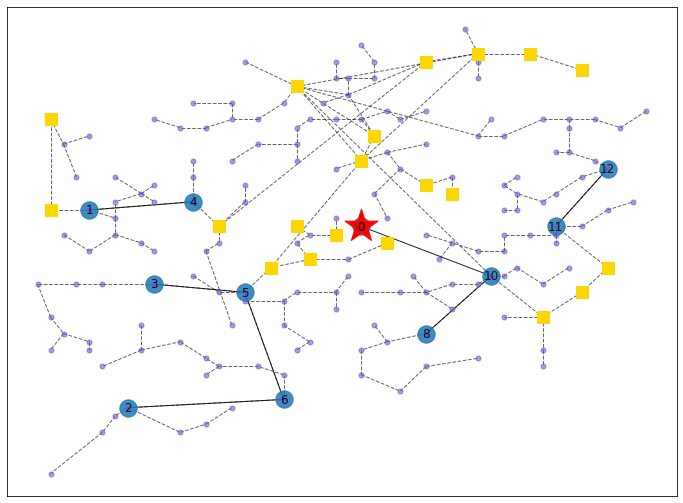

In [94]:
_weight_ = np.zeros((181,181))
for k in e:
  _weight_[k[0],k[1]] = weight_array[k[0],k[1]]
plt.figure(figsize=(12,9)) 
G_nx = nx.Graph()
G_nx2 = nx.Graph()
G_nx3 = nx.Graph()
pos_A = get_xy(13,add_node=add_node)
for i in range(181):
    for j in range(181):
        if _weight_[i, j]!=0 and i<13 and j<13:
          G_nx.add_edge(i, j)
        if _weight_[i, j]!=0 and i>0 and j>0:
          G_nx2.add_edge(i, j)
nx.draw_networkx(G_nx, pos_A, alpha=0.85)
nx.draw_networkx(G_nx2,pos,alpha=0.6,with_labels=False,node_color='slateblue',
    node_shape=".", node_size=100, style='dashed')
GG = nx.Graph()
GG.add_node(0)
nx.draw_networkx(GG, {0:pos[0]}, node_color='r',node_shape='*', node_size=1200
                 ,label='Central pipeline')
p = {}
for i in add_node:
  G_nx3.add_node(i)
  p[i] = pos[i]
nx.draw_networkx(G_nx3, p, node_color='gold', node_size=150,with_labels=False,
    node_shape=",",label='Isolated point')

plt.show() # display